# Analysing portfolio data

Here we seek to obtain understanding of the current available offers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.eda import *
plt.style.use('ggplot')

In [8]:
# Load data
portfolio = pd.read_csv('./data/final/portfolio.csv')

Since the `bogo` column that tells whether the offer is buy-one-get-one type was removed when trying to one-hot encode the `offer_type` column in the original dataset. Therefore, it needs to be added back. 

In [23]:
# Flag offer as bogo when it's neither informational nor discount
portfolio['bogo'] = (portfolio[['informational', 'discount']].sum(axis=1) == 0).astype(int)

portfolio.head(20)

,offer,reward,difficulty,duration,email,mobile,social,web,discount,informational,bogo
0,ae264e3637204a6fb9bb56bc8210ddfd,10,10,168,1,1,1,0,0,0,1
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,10,120,1,1,1,1,0,0,1
2,3f207df678b143eea3cee63160fa8bed,0,0,96,1,1,0,1,0,1,0
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5,168,1,1,0,1,0,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,20,240,1,0,0,1,1,0,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,3,7,168,1,1,1,1,1,0,0
6,fafdcd668e3743c1bb461111dcafc2a4,2,10,240,1,1,1,1,1,0,0
7,5a8bc65990b245e5a138643cd4eb9837,0,0,72,1,1,1,0,0,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,120,1,1,1,1,0,0,1
9,2906b810c7d4411798c6938adc9daaa5,2,10,168,1,1,0,1,1,0,0


In [24]:
portfolio.describe()

,reward,difficulty,duration,email,mobile,social,web,discount,informational,bogo
count,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.200000,7.700000,156.000000,1.0,0.900000,0.600000,0.800000,0.400000,0.200000,0.400000
std,3.583915,5.831905,55.713553,0.0,0.316228,0.516398,0.421637,0.516398,0.421637,0.516398
min,0.000000,0.000000,72.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,120.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,8.500000,168.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,10.000000,168.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,10.000000,20.000000,240.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The table suggests on average, the reward is \$4.2 and customers need to spend \$7.7 to claim the offer. This approximates to a 54% discount. Offers last for 156 hours or 6.5 days on average.

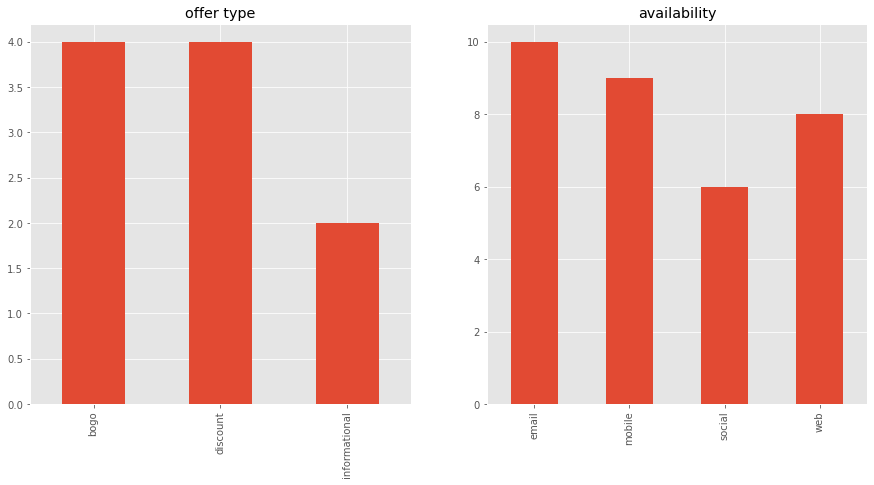

In [37]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(1,2,1)
portfolio[['bogo', 'discount', 'informational']].sum().plot(kind='bar')
plt.title('offer type')

fig.add_subplot(1,2,2)
portfolio[['email', 'mobile', 'social', 'web']].sum().plot(kind='bar')
plt.title('availability')
plt.show()

There are 4 discount offers, 2 informational offers and 4 buy-one-get-one offers. All of them are available through email, 9 through mobile, 6 through social media and 8 through the website.